In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
base_dir = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/eval-runs"
table_dir = os.path.join(base_dir, "tables")

In [32]:
fig_dir = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/presentation"
import pathlib
pathlib.Path(fig_dir).mkdir(exist_ok=True, parents=True)

In [4]:
perturbed_data_file = os.path.join(table_dir, "paper_perturbed_res.csv")

In [5]:
pert_df = pd.read_csv(perturbed_data_file)

In [6]:
pert_df

,rf_dataset,nb_baseline_acc,rf_baseline_acc,nb_baseline_prec,rf_baseline_prec,nb_baseline_top5,rf_baseline_top5
0,Baseline,0.588,0.571,0.633,0.612,0.853,0.845
1,Perturbed-10%,0.594,0.580,0.642,0.623,0.861,0.855
2,Perturbed-20%,0.600,0.589,0.653,0.636,0.867,0.865
3,Perturbed-30%,0.549,0.533,0.599,0.578,0.826,0.818
4,Perturbed-50%,0.696,0.679,0.724,0.705,0.919,0.915
5,Perturbed-70%,0.441,0.407,0.507,0.465,0.726,0.709


In [24]:
def extract_deviation(df, key):
    series = df[key]
    return np.abs(series.iloc[1:] - series.iloc[0])

In [34]:
nb_acc_dev = extract_deviation(pert_df, 'nb_baseline_acc')
nb_prec_dev = extract_deviation(pert_df, 'nb_baseline_prec')
nb_top5_dev = extract_deviation(pert_df, 'nb_baseline_top5')
rf_acc_dev = extract_deviation(pert_df, 'rf_baseline_acc')
rf_prec_dev = extract_deviation(pert_df, 'rf_baseline_prec')
rf_top5_dev = extract_deviation(pert_df, 'rf_baseline_top5')

In [26]:
pertubations = [10, 20, 30, 50, 70]

In [35]:
titles = ['Accuracy', 'Precision', 'Top 5 Accuracy']
data = [nb_acc_dev, nb_prec_dev, nb_top5_dev]
data_rf = [rf_acc_dev, rf_prec_dev, rf_top5_dev]

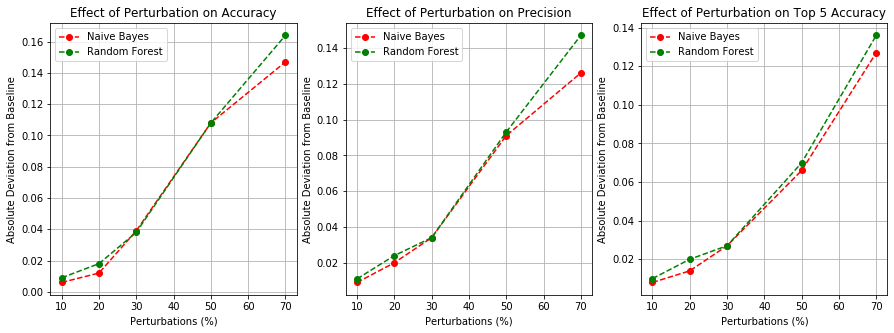

In [39]:
fig, ax = plt.subplots(1, 3)
for idx in range(len(data)):
    ax[idx].plot(pertubations, data[idx], 'r--', label='Naive Bayes', marker='o')
    ax[idx].plot(pertubations, data_rf[idx], 'g--', label='Random Forest', marker='o')
    ax[idx].set_xlabel('Perturbations (%)')
    ax[idx].set_ylabel('Absolute Deviation from Baseline')
    ax[idx].set_title('Effect of Perturbation on %s' % titles[idx])
    ax[idx].legend(loc='best')
    ax[idx].grid()
fig.set_size_inches(15, 5)
fig.savefig(os.path.join(fig_dir, "presentation_perturbation.png"))

In [40]:
# for injected symptoms
injected_data_file = os.path.join(table_dir, "paper_injected_res.csv")

In [41]:
injected_df = pd.read_csv(injected_data_file)

In [67]:
x

array([2, 4, 6])

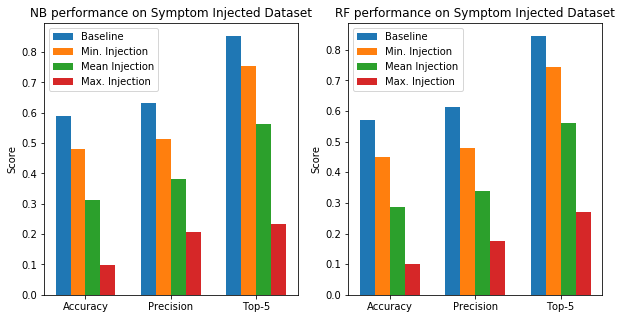

In [72]:
fig, ax = plt.subplots(1, 2)
labels = ['Accuracy', 'Precision', 'Top-5']
bar_labels =['Baseline', 'Min. Injection','Mean Injection', 'Max. Injection']
model_labels = ['NB', 'RF']

nb_inj_acc = injected_df['nb_baseline_acc']
nb_inj_prec = injected_df['nb_baseline_prec']
nb_inj_top5 = injected_df['nb_baseline_top5']
nb_inj = [nb_inj_acc, nb_inj_prec, nb_inj_top5]

rf_inj_acc = injected_df['rf_baseline_acc']
rf_inj_prec = injected_df['rf_baseline_prec']
rf_inj_top5 = injected_df['rf_baseline_top5']
rf_inj = [rf_inj_acc, rf_inj_prec, rf_inj_top5]



# the label locations
x = np.array([(idx+1) * 2 for idx in range(len(rf_inj))])
width = 0.35  # the width of the bars

distances = [-(1.5*width), -width/2, width/2, (1.5*width)]

for idx in range(2):
    data = nb_inj if idx == 0 else rf_inj
    for jdx in range(4):
        _data = [item[jdx] for item in data]
        x_dx = x + distances[jdx]
        rects = ax[idx].bar(x_dx, _data, width, label=bar_labels[jdx])
            
    
    ax[idx].set_ylabel('Score')
    ax[idx].set_title('%s performance on Symptom Injected Dataset' % model_labels[idx])
    ax[idx].set_xticks(x)
    ax[idx].set_xticklabels(labels)
    ax[idx].legend(loc='best')

fig.set_size_inches(10, 5)
fig.savefig(os.path.join(fig_dir, "presentation_injected.png"))

In [73]:
# compare augumentation vs baseline
aug_injected_file = os.path.join(table_dir, "paper_aug_res.csv")

In [75]:
aug_inj_df = pd.read_csv(aug_injected_file)

In [76]:
aug_inj_df

,rf_dataset,nb_aug_acc,rf_aug_acc,nb_aug_prec,rf_aug_prec,nb_aug_top5,rf_aug_top5
0,Baseline,0.562,0.557,0.618,0.602,0.835,0.835
1,Min Injected,0.553,0.507,0.588,0.528,0.822,0.789
2,Mean Injected,0.531,0.454,0.556,0.469,0.796,0.735
3,Max Injected,0.488,0.574,0.550,0.584,0.735,0.794


In [80]:
# nb comparisons
nb_aug_inj_acc = aug_inj_df['nb_aug_acc']
nb_aug_inj_prec = aug_inj_df['nb_aug_prec']
nb_aug_inj_top5 = aug_inj_df['nb_aug_top5']

rf_aug_inj_acc = aug_inj_df['rf_aug_acc']
rf_aug_inj_prec = aug_inj_df['rf_aug_prec']
rf_aug_inj_top5 = aug_inj_df['rf_aug_top5']

In [81]:
nb_aug_inj = [nb_aug_inj_acc, nb_aug_inj_prec, nb_aug_inj_top5]

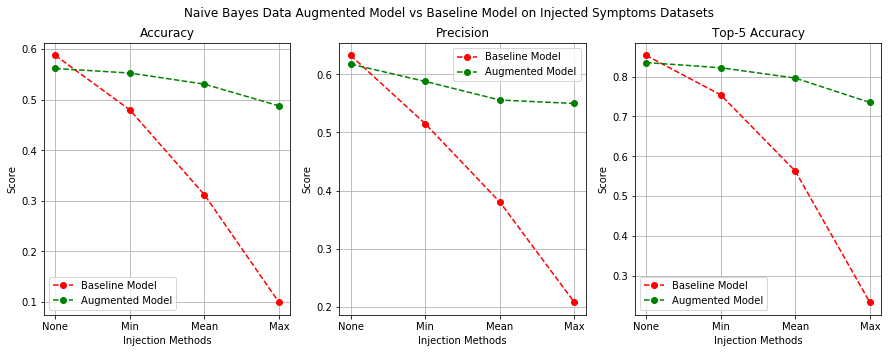

In [88]:
injection_methods = ['None', 'Min', 'Mean', 'Max']
titles = ['Accuracy', 'Precision', 'Top-5 Accuracy']
fig, ax = plt.subplots(1, 3)
for idx in range(len(nb_aug_inj)):
    ax[idx].plot(range(1, nb_aug_inj_acc.shape[0] + 1), nb_inj[idx], 'r--', label='Baseline Model', marker='o')
    ax[idx].plot(range(1, nb_inj_acc.shape[0] + 1), nb_aug_inj[idx], 'g--', label='Augmented Model', marker='o')
    ax[idx].set_xticks(range(1, nb_inj_acc.shape[0] + 1))
    ax[idx].set_xticklabels(injection_methods)
    ax[idx].set_xlabel('Injection Methods')
    ax[idx].set_ylabel('Score')
    ax[idx].set_title(titles[idx])
    ax[idx].legend(loc='best')
    ax[idx].grid()

fig.suptitle('Naive Bayes Data Augmented Model vs Baseline Model on Injected Symptoms Datasets')
fig.set_size_inches(15, 5)
fig.savefig(os.path.join(fig_dir, "presentation_injected_aug.png"))